<a href="https://colab.research.google.com/github/JatinB22/DSlab/blob/main/DSexp3/DSexp3_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aim:
Logistic Regression Theory

---

## Software:
Google Colab

---
## Theory:
### 1. Introduction to Logistic Regression

Logistic Regression is a fundamental supervised learning algorithm used for **classification tasks**. Unlike Linear Regression, which predicts a continuous value (e.g., house price), Logistic Regression predicts the probability that an input belongs to a particular category.

For example, we can use Logistic Regression to predict:
* If an email is spam or not spam (binary classification).
* If a tumor is malignant or benign (binary classification).
* If a student will pass or fail an exam (binary classification).

Although its name contains "Regression," it is a **classification algorithm**. The name comes from the fact that its underlying technique is very similar to Linear Regression.

#### Why not use Linear Regression for Classification?

Consider a binary classification problem where the output $y$ can only be 0 or 1. If we fit a Linear Regression model, the predicted output $h_\theta(x) = \theta^T x$ can be much greater than 1 or less than 0. This doesn't make sense when we want the output to be a probability, which must be between 0 and 1.

![Linear vs Logistic](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlaOBSeDuvX194sihb0apg6N0DSwjdjcDx9Q&s)

*Figure 1: Linear Regression is not suitable for classification.*

Logistic Regression solves this problem by using a special function, the Sigmoid function, to transform the output of a linear equation into a probability.

---

### 2. The Sigmoid (or Logistic) Function

The core of Logistic Regression is the **Sigmoid function**, denoted as $g(z)$. It's a mathematical function that takes any real-valued number and maps it to a value between 0 and 1.

The formula for the Sigmoid function is:
$$ g(z) = \frac{1}{1 + e^{-z}} $$

**Properties:**
* As $z \to \infty$, $e^{-z} \to 0$, so $g(z) \to 1$.
* As $z \to -\infty$, $e^{-z} \to \infty$, so $g(z) \to 0$.
* $g(0) = \frac{1}{1 + e^0} = \frac{1}{2} = 0.5$.

This S-shaped curve is perfect for representing a probability.

![Sigmoid function](https://media.geeksforgeeks.org/wp-content/uploads/20250131185746649092/Sigmoid-Activation-Function.png)

---

## 3. The Logistic Regression Hypothesis

The hypothesis of Logistic Regression, $h_\theta(x)$, gives the estimated probability that the output $y$ is 1 for a given input $x$, parameterized by $\theta$.

We create the hypothesis by combining the linear model with the sigmoid function:
1.  Start with the linear equation: $z = \theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$
2.  Feed this value $z$ into the Sigmoid function:

$$ h_\theta(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}} $$

The output $h_\theta(x)$ is interpreted as the probability of the positive class:
$$ h_\theta(x) = P(y=1 | x; \theta) $$

Since this is a probability, the probability of the negative class is:
$$ P(y=0 | x; \theta) = 1 - P(y=1 | x; \theta) = 1 - h_\theta(x) $$

---

## 4. The Decision Boundary

The decision boundary is the line or surface that separates the different classes. The model uses this boundary to decide whether an input belongs to class 1 or class 0.

We can make a prediction based on the probability output by our hypothesis $h_\theta(x)$:
* **Predict $y=1$** if $h_\theta(x) \ge 0.5$
* **Predict $y=0$** if $h_\theta(x) < 0.5$

From the Sigmoid function's graph, we know that $g(z) \ge 0.5$ when $z \ge 0$.
So, we predict $y=1$ when $\theta^T x \ge 0$.

The equation $\theta^T x = 0$ defines the **decision boundary**.

* **Linear Decision Boundary:** If our hypothesis is $h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$, the decision boundary is the line $\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$.
* **Non-Linear Decision Boundary:** We can create more complex decision boundaries by introducing polynomial features. For example, if the hypothesis is $h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2)$, the decision boundary $\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2 = 0$ will be a circle or an ellipse.

![Decision Boundary](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLBU8_xGCrDs1SKsOtEi9OoBtSi4llJ6szdQ&s)

*Figure 2: Linear and Non-Linear Decision Boundaries.*

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("giripujar/hr-analytics")

print("Path to dataset files:", path)

100%|██████████| 111k/111k [00:00<00:00, 30.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/giripujar/hr-analytics/versions/1


In [3]:
import pandas as pd
import os

file_path = os.path.join(path, 'HR_comma_sep.csv')
df = pd.read_csv(file_path)
display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
display(df.isnull().sum())

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [5]:
display(df.describe())
display(df['Department'].value_counts())
display(df['salary'].value_counts())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


,count
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


,count
salary,
low,7316
medium,6446
high,1237


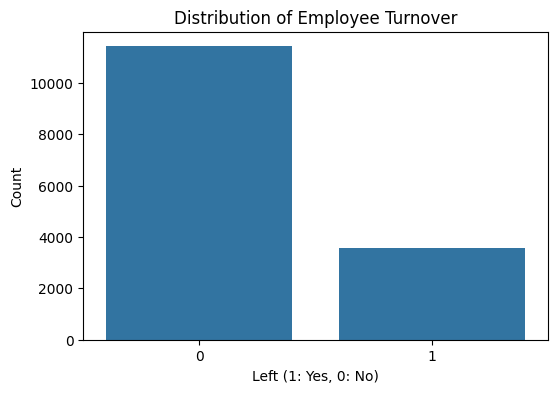

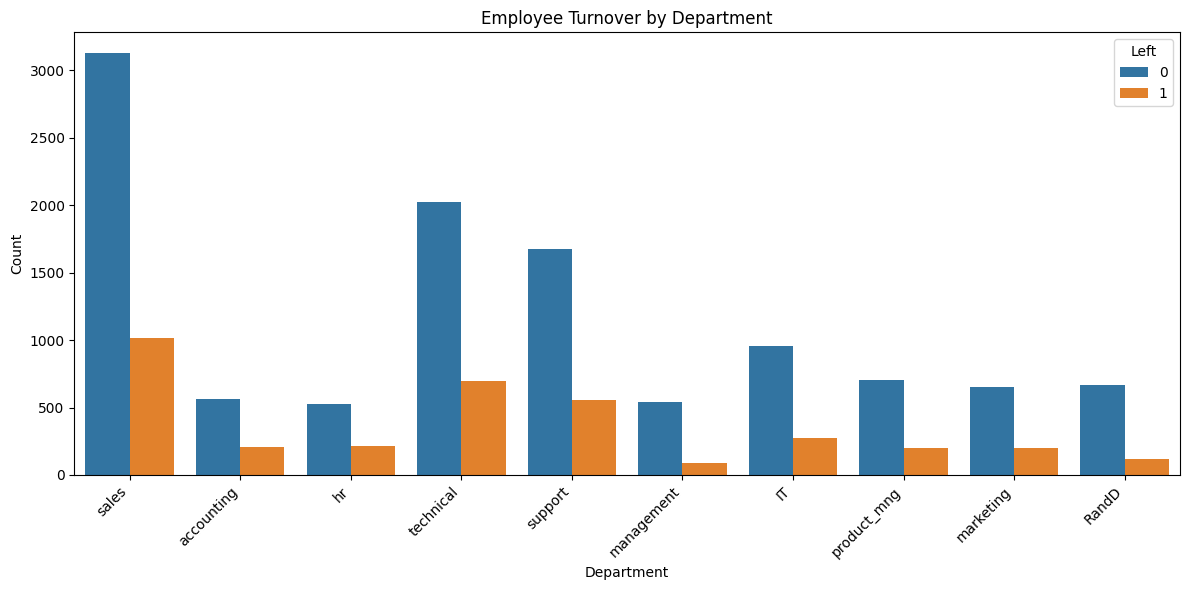

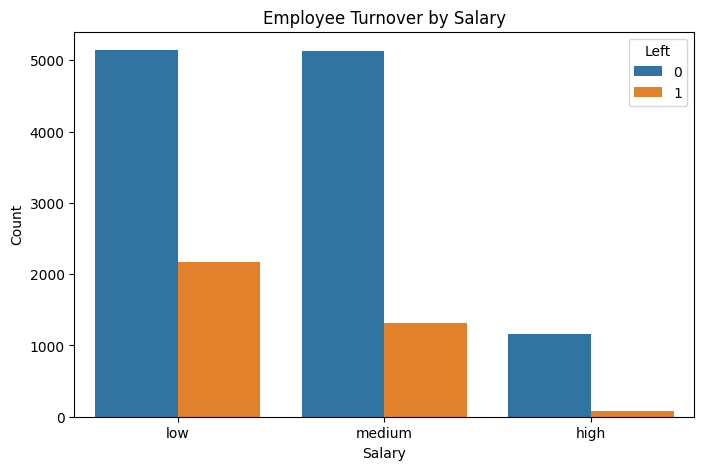

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='left', data=df)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Left (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='left', data=df)
plt.title('Employee Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='salary', hue='left', data=df)
plt.title('Employee Turnover by Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()

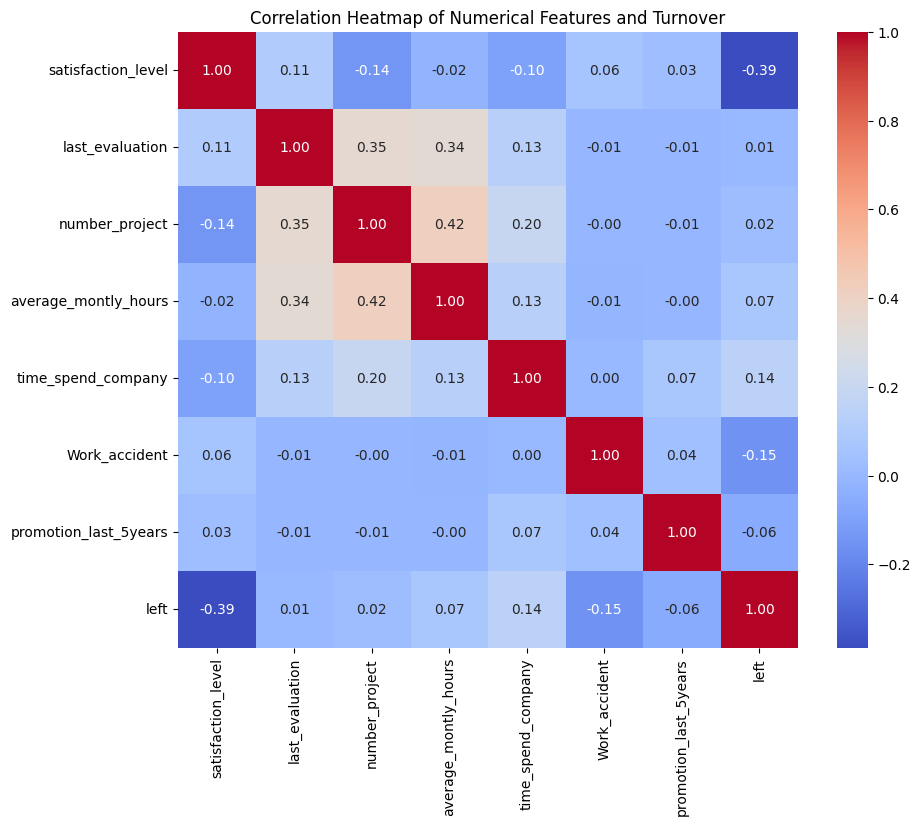

In [11]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('left')

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols + ['left']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features and Turnover')
plt.show()



In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Identify categorical columns
categorical_features = ['Department', 'salary']

# Identify numerical columns for scaling (exclude 'left' and binary columns)
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('left')
# After one-hot encoding, 'Work_accident' and 'promotion_last_5years' will be binary and don't need scaling
numerical_features.remove('Work_accident')
numerical_features.remove('promotion_last_5years')


# Create transformers for scaling and one-hot encoding
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that first preprocesses the data and then could include a model
# We are only doing the preprocessing step here
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing to the DataFrame
X_processed = pipeline.fit_transform(df)

# Get the target variable
y = df['left']

# Convert X_processed to DataFrame for easier handling if needed, keeping original column names if possible
# (Getting original column names after one-hot encoding requires more steps, skip for now)
X = pd.DataFrame(X_processed)

display(X.head())
display(y.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.752814,0.840707,0.971113,1.220423,1.713436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-2.022479,0.957554,2.593763,1.420657,0.343655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.431041,0.899131,0.971113,0.439508,1.028546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


,left
0,1
1,1
2,1
3,1
4,1


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.7610
Precision: 0.4841
Recall: 0.2380
F1-score: 0.3191
